1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def convert(n):
    nbin = bin(n)
    nhex = hex(n)
    ndec = int(nbin,2)
    print('Binary:', nbin)
    print('Decimal:', ndec)
    print('Hexadecimal:', nhex)

convert(0b1001)

Binary: 0b1001
Decimal: 9
Hexadecimal: 0x9


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
def reader_32_bit(string):
    #check
    if len(string) != 32:
        print("Error: wrong bit number!!!", len(string))
        return 1
    if string[0] == '0':
        s = 1
    else:
        s = -1
    e = int(string[1:9],2)-127
    M = string[9:]
    m = 1
    for i in range(len(M)):
        m += int(M[i],10)*2**(-i-1)
    return s*m*2**e

a = '01000101010011010000100110011001'
reader_32_bit(a)

3280.599853515625

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer.

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits


In [45]:
import sys
a = 1.
b = 1

while a-a==0:
    b = a
    a*=2
print(b)

a = 1.

while a != 0:
    b = a
    a /= 2

print(b)

8.98846567431158e+307
5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [30]:
a = 1
while a+1!=1:
    a/=2
print(a)

1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [52]:
def quad1(a,b,c):
    x1 = (-b-(b*b-4*a*c)**0.5)/(2*a)
    x2 = (-b+(b*b-4*a*c)**0.5)/(2*a)
    return x1, x2

def quad2(a,b,c):
    x1 = 2*c/(-b+(b*b-4*a*c)**0.5)
    x2 = 2*c/(-b-(b*b-4*a*c)**0.5)
    return x1, x2

X1, X2 = quad1(0.001,1000,0.001)
print(X1, X2)
#X1 accurate, X2 not accurate

X1, X2 = quad2(0.001,1000,0.001)
print(X1, X2)
#X1 not accurate, X2 accurate

def quad3(a,b,c):
    x1 = (-b-(b*b-4*a*c)**0.5)/(2*a)
    x2 = 2*c/(-b-(b*b-4*a*c)**0.5)
    return x1, x2
    
X1, X2 = quad3(0.001,1000,0.001)
print(X1, X2)

"""
The problems show off when we try to calculate the value -b+(b**2-4*a*c)**0.5 because it approaches to 0. Using the 
alternative function to calculate X2 we avoid this problem 
"""

-999999.999999 -9.999894245993346e-07
-1000010.5755125057 -1.000000000001e-06
-999999.999999 -1.000000000001e-06


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

1.010000000000001
1.0000999999998899
1.0000009999177333
1.0000000039225287
1.000000082840371
1.0000889005833413
0.9992007221626509


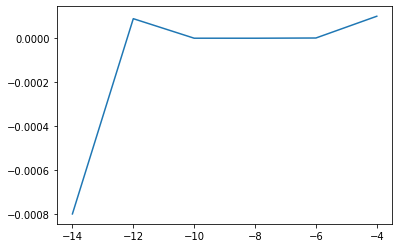

In [3]:
import matplotlib.pyplot as plt

def func(x):
    return x*(x-1)

delta = 10**(-2)
df = (func(1+delta)-func(1))/delta
print(df)

#delta is still too big

l = [-4, -6, -8, -10, -12, -14]
m =[]
for i in l:
    delta = 10**i
    m.append((func(1+delta)-func(1))/delta - 1)
    print((func(1+delta)-func(1))/delta)
    
plt.plot(l, m)
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [9]:
import math

value = math.pi/2
print("true value = ", value)

def func(x):
    return (1-x**2)**0.5

def integral(N):
    h = 2/N
    l = [-1 + h/2 + i*h for i in range(N)]
    Y = [h*func(i) for i in l]
    return sum(Y)

#N = 100
N = 6*10**5
I = integral(N)
print("\nN = 100 computation: ", I)
Delta = I - value
print("Delta = ", Delta)

#1 second computation
N = 8*10**5
I = integral(N)
print("\n1 s computation: ", I)
Delta = I - value
print("Delta = ", Delta)
%timeit integral(N)

#1 minute computation
N = 8*10**7
I = integral(N)
print("\n1 min computation: ", I)
Delta = I - value
print("Delta = ", Delta)
#ATTENTION: The calculation of the time requires a lot of time
%timeit integral(N)

  


true value =  1.5707963267948966

N = 100 computation:  1.5707963278430572
Delta =  1.0481606693701906e-09

1 s computation:  1.5707963278430572
Delta =  1.0481606693701906e-09
461 ms ± 6.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1 min computation:  1.5707963267952527
Delta =  3.561595462997502e-13


KeyboardInterrupt: 